In [3]:
pip install wordcloud


                                              0.0/300.2 kB ? eta -:--:--
     -------------------------------------- 300.2/300.2 kB 6.2 MB/s eta 0:00:00


In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

In [5]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3' 
print(url)

https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3


In [6]:
webpage = urlopen(url) 
source = BeautifulSoup(webpage, 'html.parser', from_encoding='utf-8') 

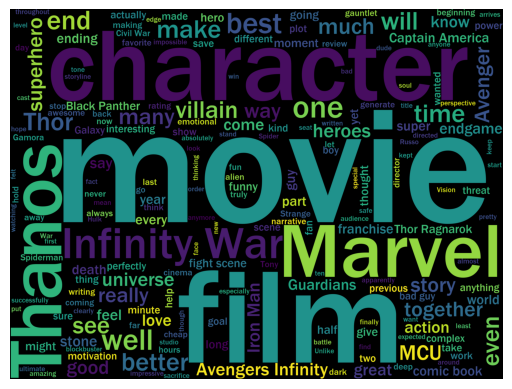

In [8]:
review_list = source.findAll('div', {'class': 'imdb-user-review'}) 
sum_review = ''   # wordcloud 띄워줄때 쓸 모든 리뷰 텍스트 다 합친 문자열

for review in review_list:
    content=review.find('div',{'class':'text show-more__control'}).get_text()
    sum_review=sum_review+content

def generate_wordcloud(text):  # 워드클라우드 만드는 부분
    wordcloud = WordCloud(font_path='framd.ttf',
                          width=2400,height=1800,
                          ranks_only=None, 
                          relative_scaling = 0.8, 
                          stopwords = set(STOPWORDS)
                          ).generate(text) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.show()  # 화면에 띄워주기 위한 matplotlib 함수

generate_wordcloud(sum_review)